# Chapter 9 독립동일분포

### 독립동일분포(independently and identically distributed, i.i.d.)
### - 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수
### - 독립동일분포는 "동일한 조건 아래에서 수행되는 실험이나 관측을 여러 번 반복하여 데이터를 얻는 것을 수학되는 실험이나 관측을 여러 번 반복하여 데이터를 얻는 것"

#### 5.2절과 7.2절에서 2차원확률변수(이산형/연속형)를 다루었음. 
#### 9 장에서는 서로 독립인 다차원 확률변수입니다. 
### 독립이고 다차원인 확률변수를 다루는 이유는 
### 1) 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 
### 2) 다차원인 확률변수의 실현값으로 간주될 수 있기 때문입니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x): # y에 대해서 다 계산
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y): # x에 대해서 다 계산
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 9.1 독립성 
- 확률변수의 독립성(independence): 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없을을 나타내는 개념입니다. 
- 2차원 확률변수(X,Y)의 경우, 다음과 같은 관계가 성립할 때 X와 Y는 독립이라고 합니다 
- $ f_{X,Y}(x,y) = f_{X}(x)f_{Y}(y)$ 
- 즉, 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있습니다. 
- 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냅니다.


### 독립성과 무상관성
- 독립-> 무상관(o) , 무상관->독립(x) 
- 2개의 확률변수X와 Y가 독립일 때 X와 Y는 무상관이 되지만,
- X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아닙니다. 
- (검증) $ f_{X,Y}(x,y) = f_{X}(x)f_{Y}(y)$ 

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-8.326672684688674e-17

In [5]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.0

In [7]:
# 독립성 정의 성립안함
f_X(0) * f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

## 9.2 합의 분포
- 합의분포는 서로 독립이고 동일한 확률분포를 따르는 확률변수 X1, X2, X3, ..., Xn의 합 $\sum_{i=1}^{n}X_{i} = X_{1} + X_{} + ... + X_{n}$ 이 따르는 확률 분포를 의미합니다. 
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있습니다.

### "확률변수 합"의 기대값
- 확률변수 $X_{1}, X_{2}, ... , X_{n}$이 서로 독립이면
\
$ E(X_{1}+X_{2}+...+X_{n})=E(X_{1})+E(X_{2})+...+E(X_{n})$이 성립합니다. 

### "확률변수 합"의 분산
- 확률변수 $X_{1}, X_{2}, ... , X_{n}$이 서로 독립이면  
$ V(X_{1}+X_{2}+...+X_{n})=V(X_{1})+V(X_{2})+...+V(X_{n})$ 이 성립합니다.
- $X_{1}, X_{2}, ... , X_{n}$은 서로 무상관이 되고, 공분산 항이 모두 0이 됩니다.

## 9.2.1. '정규분포의 합'의 분포
- 서로 독립인 두 확률변수 X ~ N(1,2) 와 Y ~ N(2,3)이 있습니다. 
- 기대값: E(X+Y)=E(X)+E(Y)=3 
- 분산: V(X+Y)=V(X)+V(Y)=5

In [8]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

### 재생성
- 정규분포의 경우, 정규분포의 합도 정규분포가 되는 성질이 있습니다. 
- 이처럼 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서, 그 합도 동일한 확률분포가 되는 성질을 재생성(reproductive property)이라고 합니다. 

### '정규분포의 합'의 분포
- 서로 독립인 확률변수 $X_{1}$~$N(\mu_{1},\sigma_{1}^{2}), X_{2}$~$N(\mu_{2},\sigma_{2}^{2})$, ... , $ X_{n} $ ~ $ N(\mu_{n},\sigma_{n}^{2})$ 에 관해서 
\
$\sum_{i=1}^{n}X_{i}$~$N(\sum_{i=1}^{n}\mu_{i},\sum_{i=1}^{n}\sigma_{i}^{2})$ 이 성립한다. 

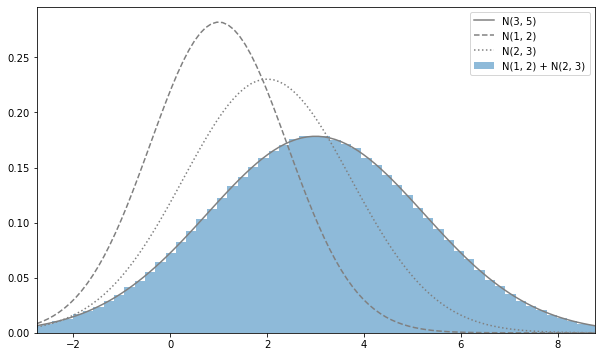

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

## 9.2.2. '포아송 분포의 합'의 분포
- 포아송 분포: 임의의 사건이 단위시간당 발생하는 건수가 따르는 확률분포 

- 서로 독립인 확률변수 $X_{1}$ ~ $Poi(\lambda_{1}), X_{2}$ ~ $Poi(\lambda_{2})$, ... , $ X_{n} $ ~ $ Poi(\lambda_{n})$ 에 관해서 
\
$\sum_{i=1}^{n}X_{i}$~$Poi(\sum_{i=1}^{n}\lambda_{i})$ 이 성립한다.

In [12]:
# X1~Poi(3) + X2~Poi(4) 분포 
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.99478, 6.987422751599999)

<ipython-input-11-adc3e12cc1c5>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20,


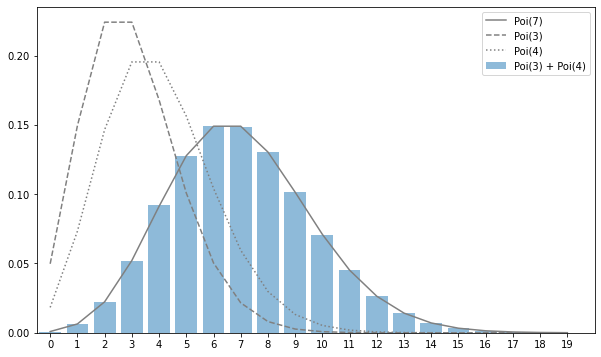

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

## 9.2.3 '베르누이 분포의 합'의 분포

확률변수가 iid인 $X_{1},X_{2},...,X_{n}$ ~ Bern(p)에 관해서
\
$\sum_{i=1}^{n}X_{i}$~$Bin(n,p)$ 가 성립한다.

- 베르누이 분포: 기본적인 이산형 확률분포로, 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
-'베르누이 분포의 합' = '이항분포'  (재생성이 없다)



In [18]:
# Bern(0.3)인 Xi를 10개 합친 기대값과 분산 
# 기대값: np
# 분산: np(1-p)
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
print(Xs_sample)
print(Xs_sample.shape)
sum_sample = np.sum(Xs_sample, axis=0)
print(sum_sample)
print(sum_sample.shape)
np.mean(sum_sample), np.var(sum_sample)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]]
(10, 1000000)
[3 2 2 ... 3 5 3]
(1000000,)


(2.998765, 2.098707474775)

<ipython-input-19-775eabe13337>:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10,


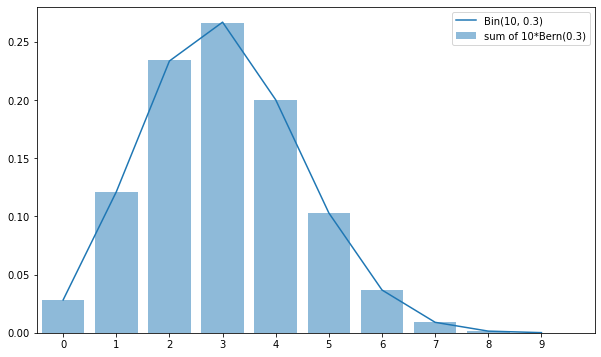

In [19]:
# '베르누이 분포의 합' = '이항분포' (재생성이 없다)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 9.3 표본평균의 분포 
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 X1, X2, .... , Xn의 표본평균 $\bar{X}$ = $\frac{X_{1}+X_{2}+...+X_{n}}{n}$이 따르는 분포입니다. 

### 표본평균의 기대값: 기대값의 선형성을 사용 
$E(\bar{X}) = E(\frac{X_{1}+X_{2}+...+X_{n}}{n}) = \frac{E(X_{1})+E(X_{2})+...+E(X_{n})}{n} = \frac{n\mu}{n} = \mu $
- 각각의 확률분포 $X_{1},X_{2} 등은 기대값이 \mu, 분산이 \sigma^{2}임.$

### 표본평균의 분산: $V(aX) = a^{2}V(X)$
$V(\bar{X}) = V(\frac{X_{1}+X_{2}+...+X_{n}}{n}) = \frac{V(X_{1})+V(X_{2})+...+V(X_{n})}{n} = \frac{n\sigma^{2}}{n^{2}} = \frac{\sigma^{2}}{n} $
- 각각의 확률분포 $X_{1},X_{2} 등은 기대값이 \mu, 분산이 \sigma^{2}임.$

## 9.3.1 정규분포의 표본평균 분포 

- n=10인 정규분포 N(1,2)의 표분평균 $\bar{X}$은 평균은 1, 분산은 $\frac{2}{10}$ 입니다 

In [21]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.0009311789046391, 0.1999793186071348)

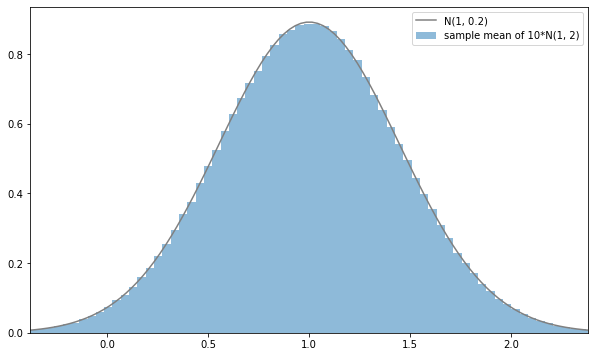

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

## 9.3.2 포아송 분포의 표본평균 분포 
- 포아송 분포의 기대값은 $\lambda$ , 분산은 $\lambda$임

- n=10인 정규분포 Poi(3)의 표분평균 $\bar{X}$은 평균은 3, 분산은 $\frac{3}{10}$ 입니다 
- 기대값은 3으로 같지만, 분산은 $\frac{3}{10}$으로 3과 다르다.

In [23]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.0002372999999998, 0.30064683368870987)

### 재생성이 있는 포아송 분포에서도 표준평균에 대해서는 포아송 분포를 유지할 수 없습니다. 

#### - 좌우대칭인 산 모양의 분포로 정규분포에 가까운 형태가 되었습니다. 
#### - 실제로 포아송 분포의 표본분포는 근사적으로 정규분포를 따르고, 다음에 나오는 중심극한정리에 의해 설명가능함. 

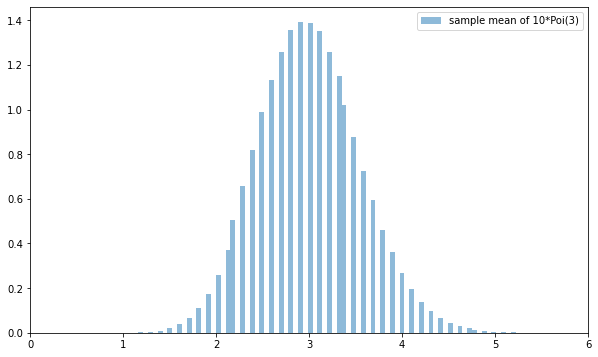

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

## 중심극한정리(Central Limit Theorem)
### - 확률변수 $X_{1},X_{2},...,X_{n}$이 서로 독립이고, 기대값이 $\mu$, 분산이 $\sigma^{2}$인 확률분포 F를 따를 때, n이 커짐에 따라 표준평균 $\bar{X}$의 분포는 정규분포 $N(\mu,\frac{\sigma^{2}}{n})$에 가까워집니다. 

In [25]:
# X1,X2,..,Xn이 Poi(3)을 따르는 경우, n이 10000이면 N(3,3/10000)을 따른다. 
# X1,X2,..,Xn의 평균은 3 , 분산 3임. 

l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
print(Xs_sample)
print(Xs_sample.shape)
sample_mean = np.mean(Xs_sample, axis=0)
print(sample_mean)
print(sample_mean.shape)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

[[7 2 3 ... 4 1 2]
 [5 4 2 ... 4 5 3]
 [4 1 2 ... 0 3 1]
 ...
 [2 4 1 ... 2 2 1]
 [4 2 3 ... 3 5 6]
 [3 3 2 ... 1 3 2]]
(10000, 10000)
[3.025 2.997 3.003 ... 2.972 3.006 3.042]
(10000,)


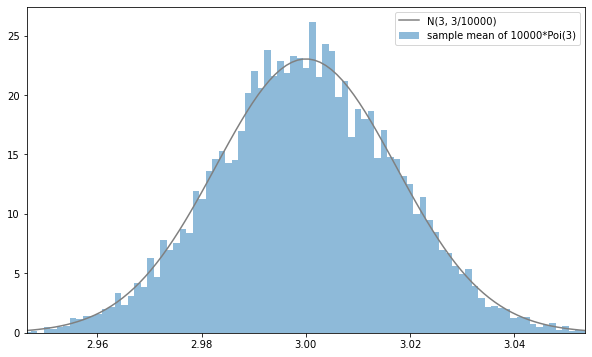

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

- 조금 울퉁불퉁하지만 정규분포형태에 가까워 지고 있음을 알 수 있음. 
- 여기서는 포아송 분포에서 중심극한정리를 확인했지만, 반드시 다른 분포에서도 성립하고 있는지 확인하기 바랍니다. 

## 9.3.4 대수의 법칙
### 대수의 법칙은 표본크기를 키우면 표본평균은 모평균에 수렴한다고 주장하는 정리.

In [35]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
print(sample)
print(sample.shape)
space = np.linspace(100, n, 50).astype(int)
print(space)
print(space.shape)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T
print(plot_list)
print(plot_list.shape)

[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
(100000, 4)
[   100   2138   4177   6216   8255  10293  12332  14371  16410  18448
  20487  22526  24565  26604  28642  30681  32720  34759  36797  38836
  40875  42914  44953  46991  49030  51069  53108  55146  57185  59224
  61263  63302  65340  67379  69418  71457  73495  75534  77573  79612
  81651  83689  85728  87767  89806  91844  93883  95922  97961 100000]
(50,)
[[0.18  0.169 0.17  0.167 0.164 0.163 0.163 0.163 0.16  0.16  0.161 0.162
  0.163 0.163 0.164 0.164 0.164 0.165 0.166 0.166 0.166 0.166 0.166 0.166
  0.166 0.167 0.166 0.166 0.166 0.166 0.166 0.165 0.165 0.165 0.165 0.165
  0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165 0.165
  0.165 0.165]
 [0.15  0.159 0.158 0.163 0.165 0.164 0.165 0.165 0.164 0.161 0.16  0.16
  0.16  0.16  0.161 0.162 0.162 0.162 0.163 0.163 0.164 0.164 0.164 0.164
  0.164 0.164 0.165 0.165 0.165 0.165 0.165 0.165 0.166 0.165 0.166 0.166
  0.166 0.166 0.166 0.

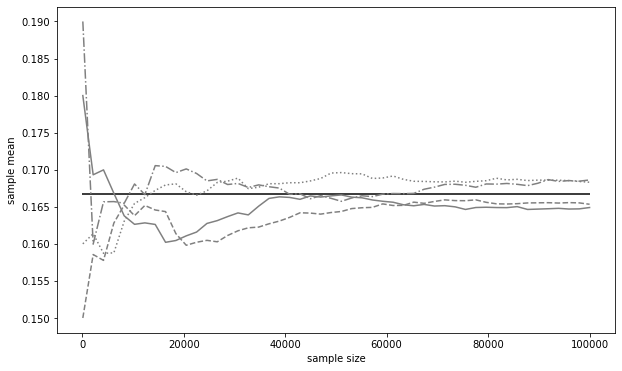

In [37]:
# 실행횟수가 커지면,표본크기가 커지면서 어떤 무작위 추출도 그 결과는 1/6에 가까워지고 있음. 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()